In [1]:
import xarray as xr
import numpy as np
import sys; sys.path.append('../')
import matplotlib.pyplot as plt
from helpers.plot_helpers import *
from helpers_mom6.computational_tools import remesh, select_LatLon, Lk_error, x_coord, y_coord
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean
import os
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")
import hvplot.xarray
import hvplot
hvplot.output(widget_location='bottom')

In [2]:
R32 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R32/snapshots_*', decode_times=False, chunks={'time':1, 'zl':1}).isel(time=slice(None,None,6)).isel(xq=slice(None,None,8), xh=slice(None,None,8), yh=slice(None,None,8), yq=slice(None,None,8))

In [3]:
def KEz(ds):
    return 0.5 * (ds.h * (remesh(ds.u**2, ds.h) + remesh(ds.v**2, ds.h)))

In [49]:
# R4 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-long/bare/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
# R4_ann_old = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-ANN/CM26_grid_harmonic_ver3-FCT/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
# R4_ann = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-ANN/May-16-FCT-0/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
# R2_ann = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-ANN/May-16-FCT-0/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
#R1_ann = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/May-16-FCT-0/output/snapshots*', decode_times=False).chunk({'time':1})

In [4]:
R2 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-long/bare/14500days/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R2_ann_cs0 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-ANN/May-16-Cs-0.00/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R2_ann_cs1 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-ANN/May-16-Cs-0.01/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R2_ann_fct3 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-ANN/May-16-FCT-3/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R2_ann_fct0_cs0 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-ANN/May-16-FCT-0-Cs-0.00/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})

In [5]:
R32 = R32.chunk({'zl':-1})
R2 = R2.chunk({'zl':-1})
R2_ann_cs0 = R2_ann_cs0.chunk({'zl':-1})
R2_ann_cs1 = R2_ann_cs1.chunk({'zl':-1})
R2_ann_fct3 = R2_ann_fct3.chunk({'zl':-1})
R2_ann_fct0_cs0 = R2_ann_fct0_cs0.chunk({'zl':-1})

In [10]:
R1 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-long/bare-0.2-Sadourny/output/snapshots*', decode_times=False).chunk({'time':1})
R1_ann_cs0 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/May-16-Cs-0.00/output/snapshots*', decode_times=False).chunk({'time':1})
R1_ann_cs1 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/May-16-Cs-0.01/output/snapshots*', decode_times=False).chunk({'time':1})
R1_ann_fct3 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/May-16-FCT-3/output/snapshots*', decode_times=False).chunk({'time':1})
R1_ann_fct0_cs0 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/May-16-FCT-0-Cs-0.00/output/snapshots*', decode_times=False).chunk({'time':1})

In [11]:
import matplotlib as mpl

default_rcParams({'figure.subplot.wspace': 0.0, 'figure.subplot.hspace': 0.3, 'font.size': 14})

def plot(idx=0, zl=slice(None,None)):
    plt.figure(figsize=(20,7.5))
    for col, (exp, label) in enumerate(
        zip(
        [R1, R1_ann_cs0, R1_ann_cs1, R1_ann_fct0_cs0, R1_ann_fct3, R32],
        ['$1^{\circ}$', 
         '$1^{\circ}$, ANN+Cs=0.00',
         '$1^{\circ}$, ANN+Cs=0.01',
         '$1^{\circ}$, ANN+FCT0+Cs=0.00',
         '$1^{\circ}$, ANN+FCT3',
         '$1/32^{\circ}$']
        )):
        plt.subplot(1,6,col+1)
        KE = KEz(exp).isel(zl=zl).sum('zl')
        KE = KE.isel(time=idx%len(KE.time))
        im = KE.plot.imshow(
            norm=mpl.colors.LogNorm(vmin=1e-1, vmax=1e+3),
            cmap='inferno',
            add_colorbar=False,
            interpolation='none'
        )
        plt.gca().axes.set_aspect('equal')
        plt.xlabel('')
        plt.ylabel('')
        plt.title(label, fontsize=14)
        lons = [10,30,50]
        plt.xticks(lons, [f'${lon}^'+'{\circ}$E' for lon in lons])
        if col==0:
            lats = [-60, -40, -20, 0, 20, 40, 60]
            lat_ticks = [f'${-lat}^'+'{\circ}$S' if lat<0 else f'${lat}^'+'{\circ}$N' for lat in lats]
            plt.yticks(lats, lat_ticks)
        else:
            plt.yticks([])
            
    plt.colorbar(im, pad=0.08, aspect=100, orientation='horizontal', ax=plt.gcf().axes, extend='both').set_label(fontsize=13, label='KE, $\mathrm{m}^3 \mathrm{s}^{-2}$')

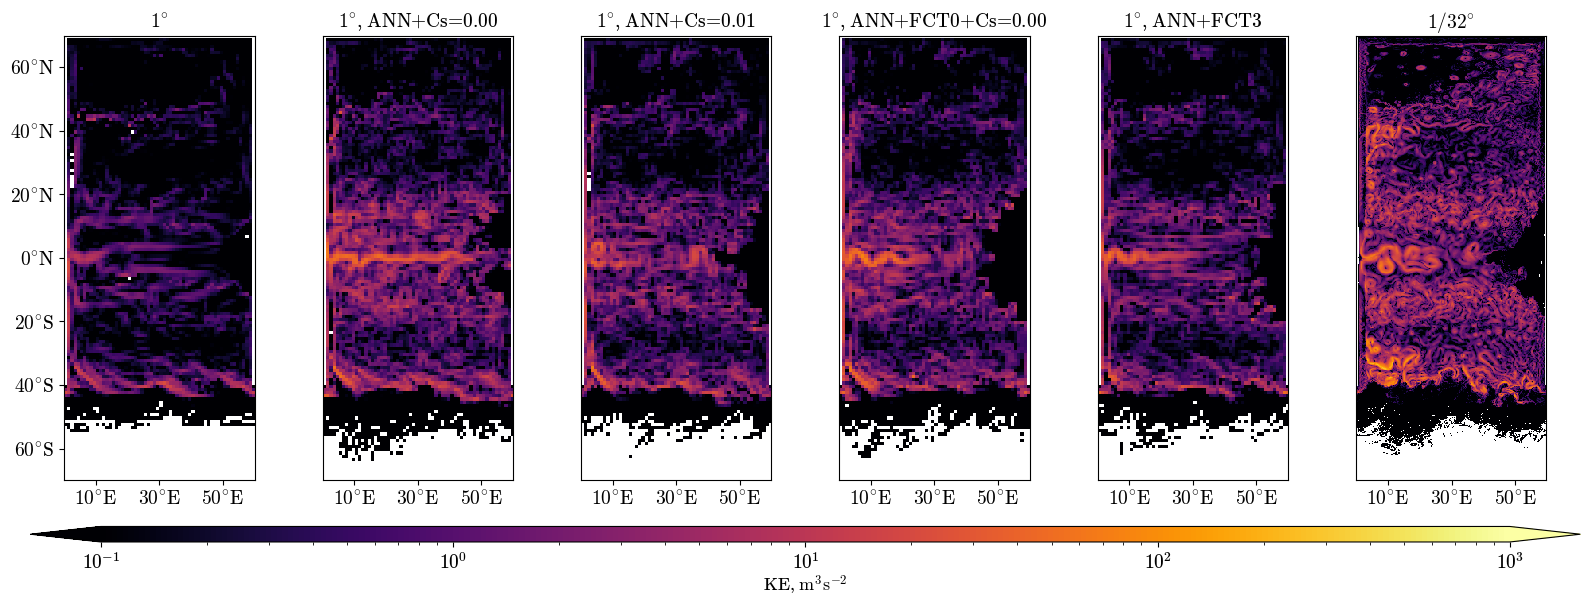

In [44]:
plot(-1,zl=slice(2,3))

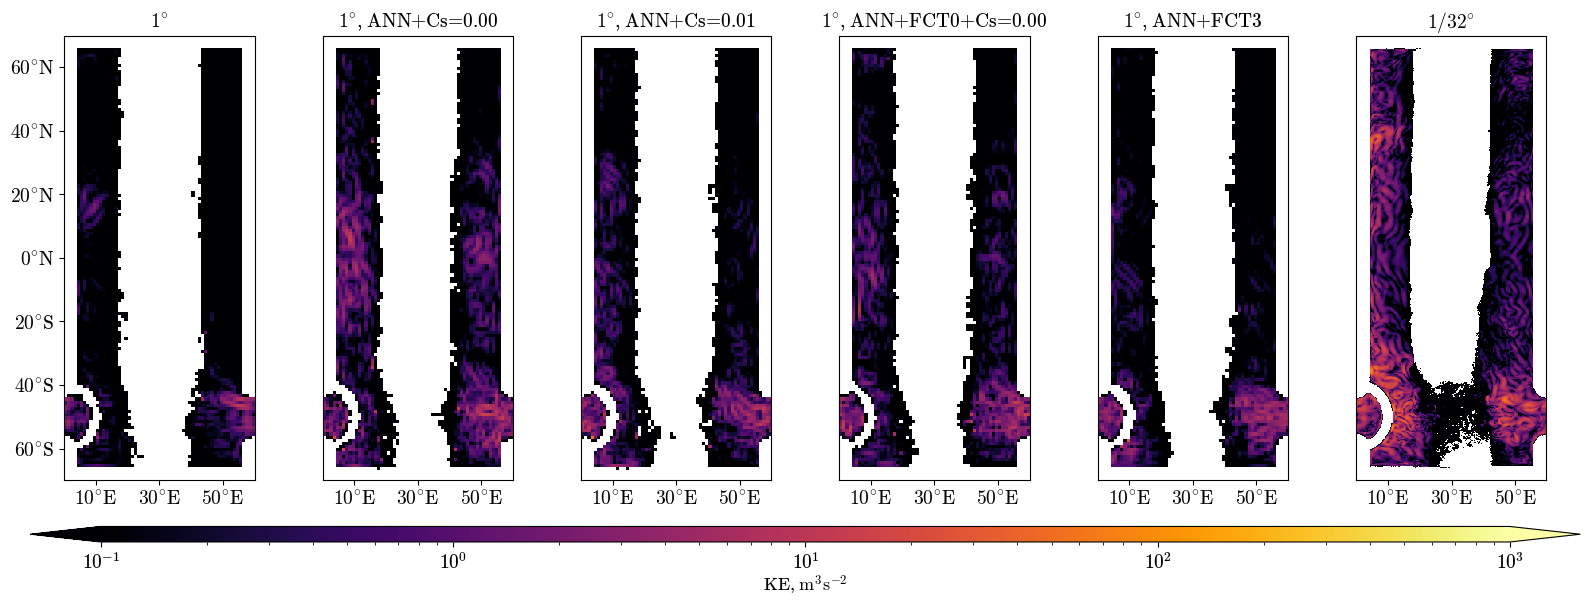

In [45]:
plot(-1,zl=slice(14,15))

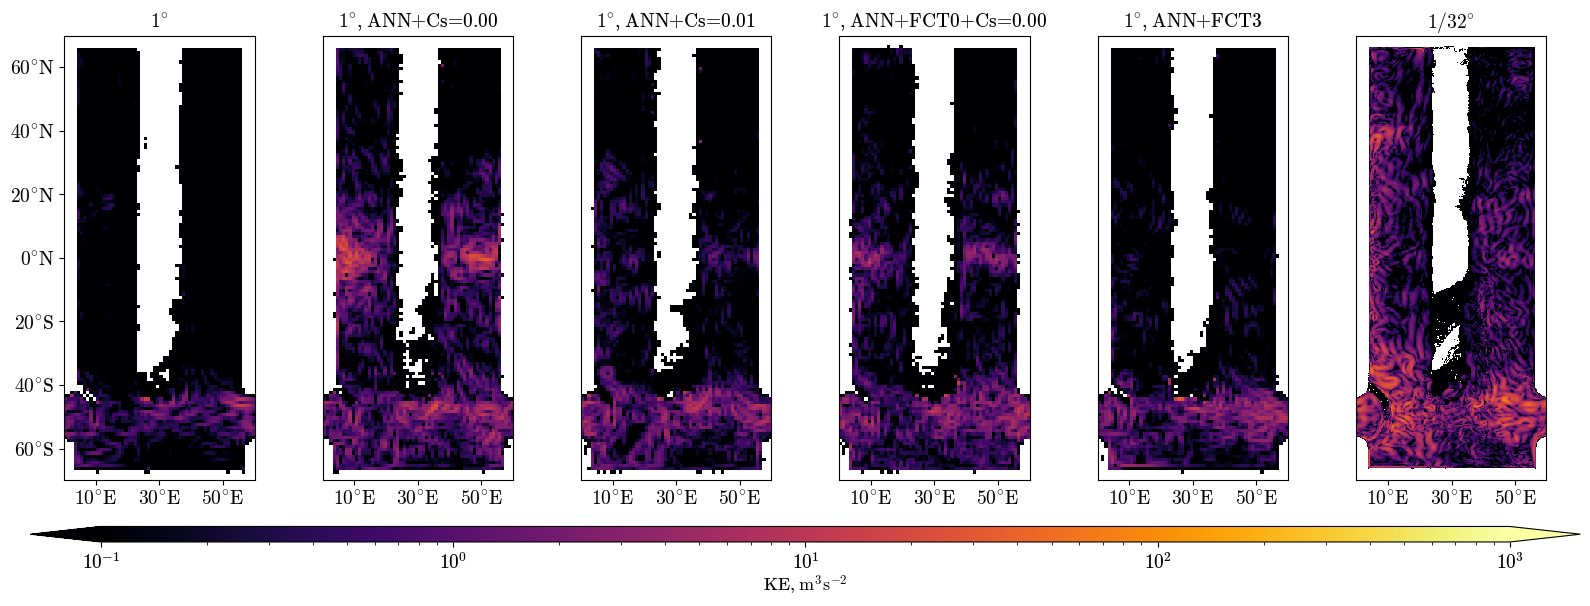

In [47]:
plot(-1,zl=slice(12,13))

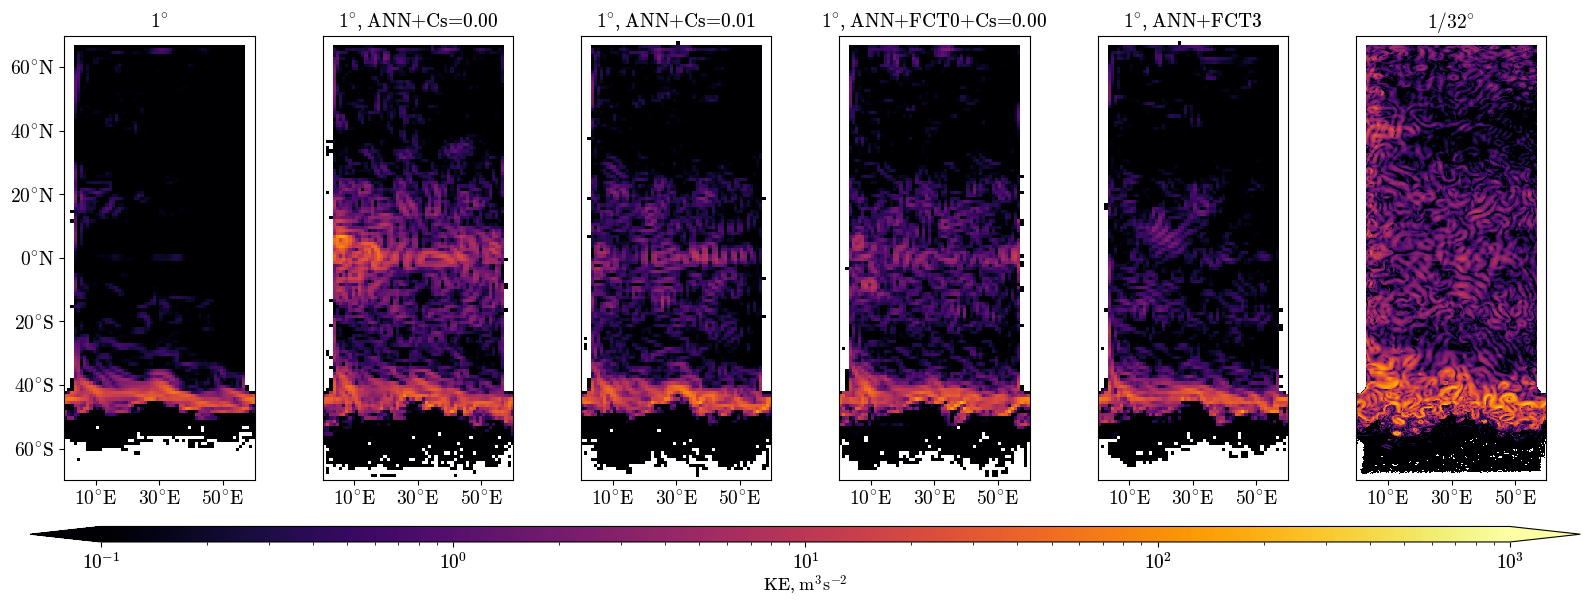

In [42]:
plot(-1,zl=slice(6,7))

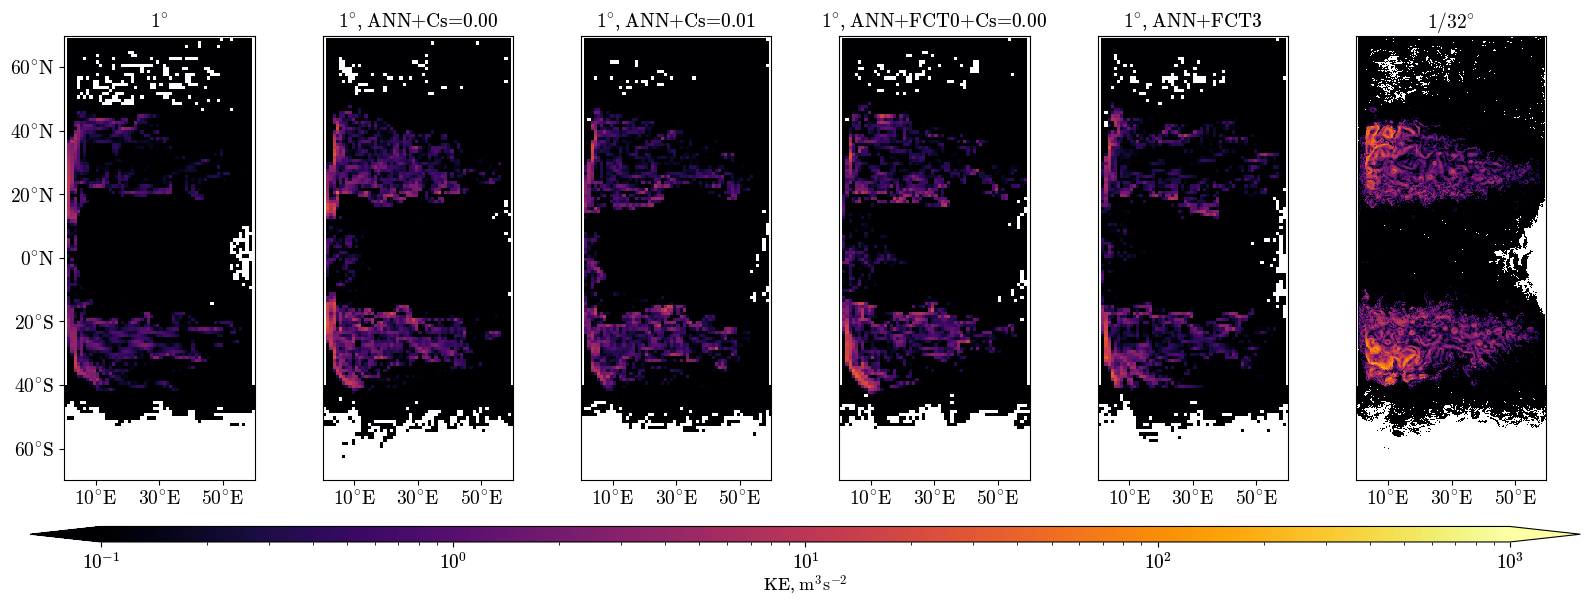

In [43]:
plot(-1,zl=slice(0,1))

CPU times: user 2.09 s, sys: 265 ms, total: 2.36 s
Wall time: 3.79 s


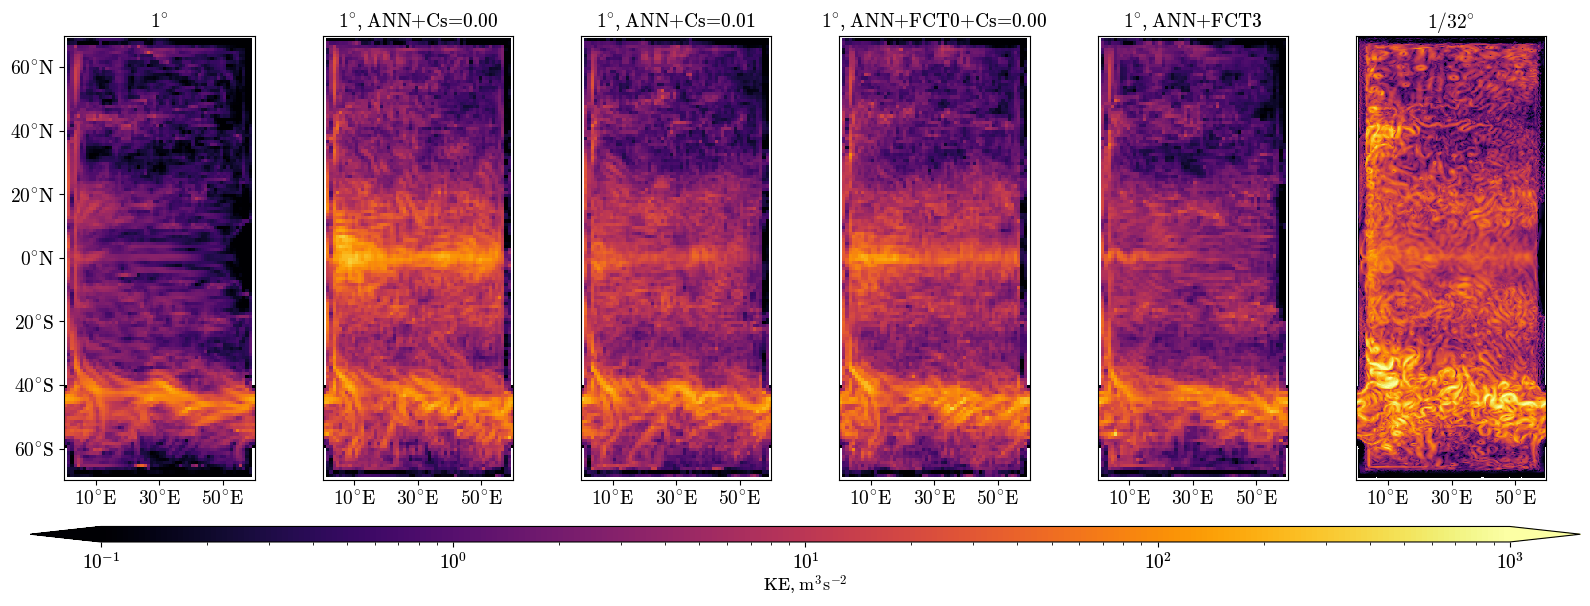

In [13]:
%time plot(-1,zl=slice(None,None))

In [14]:
from helpers.plot_helpers import create_animation_ffmpeg
%time create_animation_ffmpeg(lambda idx: plot(idx,slice(None,None)), list(np.arange(200))+list(np.arange(800,1000)), FPS=15, filename='May16_NW2_R1.mp4', dpi=150)
                              #np.arange(900,1000), FPS=15, filename='May16_NW2_R2.mp4', dpi=150)

Native resolution of snapshots is used: 2384x9045

Animation May16_NW2_R1.mp4 at FPS=15 will last for 26.7 seconds. The frames are saved to 
.ffmpeg/May16_NW2_R1

Running the command:
cd /scratch/pp2681/MOM6-examples/src/MOM6/experiments/ANN-Results/offline_analysis; ffmpeg -y -framerate 15 -i .ffmpeg/May16_NW2_R1/frame-%d.png -s:v 2384x904 -c:v libx264 -profile:v high -crf 20 -pix_fmt yuv420p May16_NW2_R1.mp4


sh: 1: module: not found
ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --en

CPU times: user 20min 10s, sys: 3min 53s, total: 24min 4s
Wall time: 25min 30s


frame=  400 fps= 29 q=-1.0 Lsize=   55235kB time=00:00:26.46 bitrate=17096.3kbits/s speed=1.89x    
video:55229kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.010457%
[libx264 @ 0x5638f86db580] frame I:2     Avg QP:19.01  size:192142
[libx264 @ 0x5638f86db580] frame P:101   Avg QP:21.37  size:157264
[libx264 @ 0x5638f86db580] frame B:297   Avg QP:24.63  size:135642
[libx264 @ 0x5638f86db580] consecutive B-frames:  1.0%  0.0%  0.0% 99.0%
[libx264 @ 0x5638f86db580] mb I  I16..4: 25.1% 36.1% 38.8%
[libx264 @ 0x5638f86db580] mb P  I16..4:  1.9%  8.2% 23.0%  P16..4:  3.6%  8.0%  9.1%  0.0%  0.0%    skip:46.2%
[libx264 @ 0x5638f86db580] mb B  I16..4:  1.3%  5.2% 13.6%  B16..8:  6.7% 11.1%  9.9%  direct: 4.7%  skip:47.6%  L0:42.1% L1:31.5% BI:26.4%
[libx264 @ 0x5638f86db580] 8x8 transform intra:25.6% inter:46.2%
[libx264 @ 0x5638f86db580] coded y,uvDC,uvAC intra: 94.3% 97.8% 97.3% inter: 31.6% 34.0% 28.6%
[libx264 @ 0x5638f86db580] i16 v,h,dc,p: 38% 50%  5%  

In [50]:
%time layer = KEz(R1_ann_fct3).max(['xh','yh']).argmax('zl').compute()

CPU times: user 13.1 s, sys: 1.04 s, total: 14.2 s
Wall time: 14.4 s


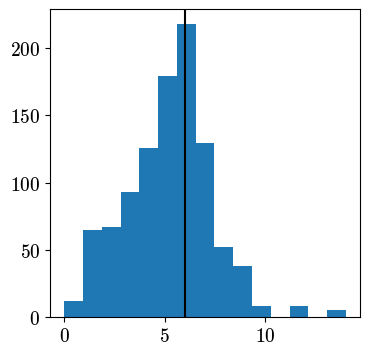

In [31]:
layer.plot.hist(bins=15)
plt.axvline(x=6, color='k')

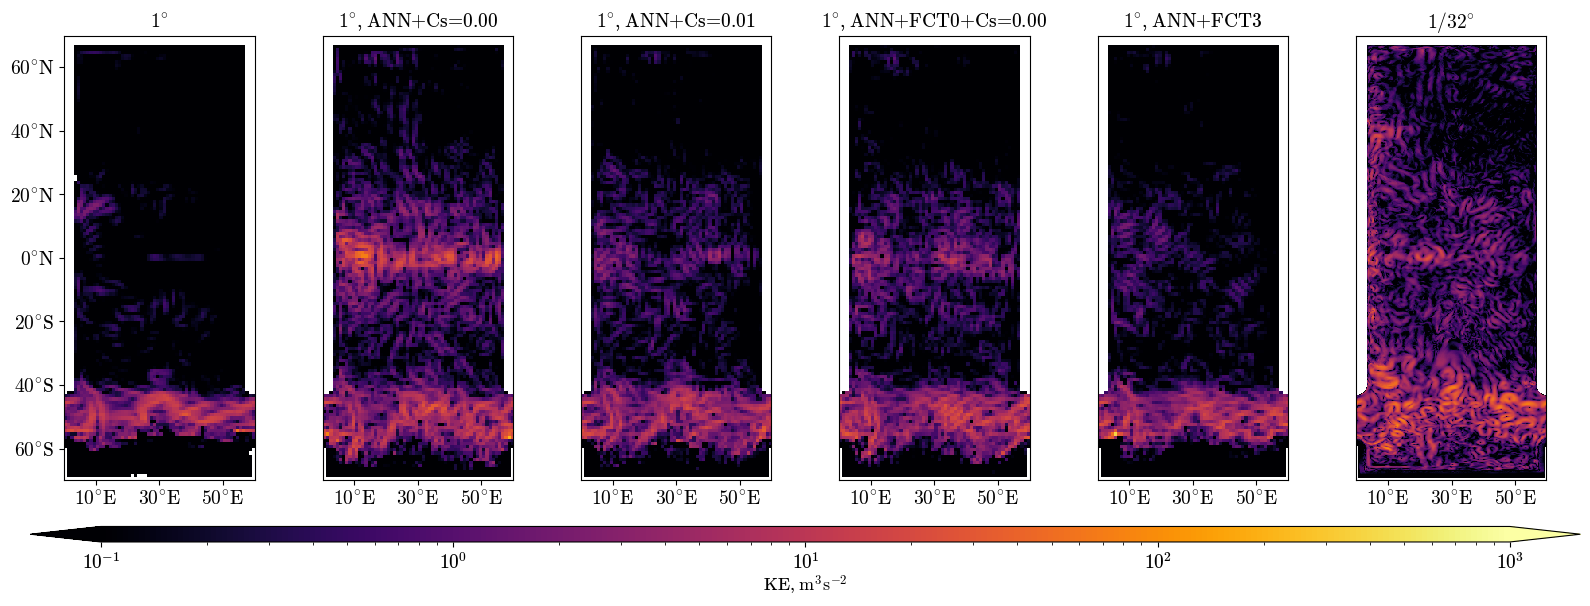

In [51]:
plot(-1,zl=slice(int(layer[-1]),int(layer[-1])+1))

In [32]:
def KE(ds):
    return 0.5 * (remesh(ds.u**2, ds.h) + remesh(ds.v**2, ds.h))

In [33]:
%time layer = KE(R1_ann_fct3).max(['xh','yh']).argmax('zl').compute()

CPU times: user 13.8 s, sys: 798 ms, total: 14.6 s
Wall time: 6.46 s


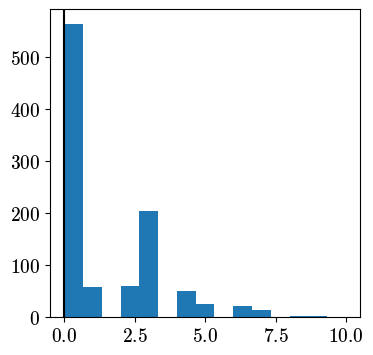

In [37]:
layer.plot.hist(bins=15)
plt.axvline(x=0, color='k')

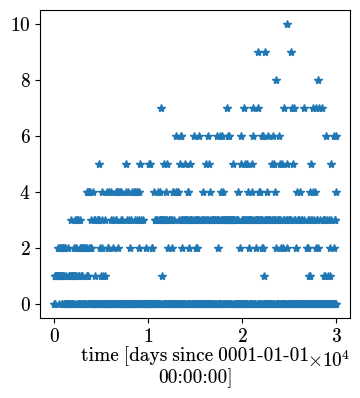

In [41]:
layer.plot(marker='*', ls='')

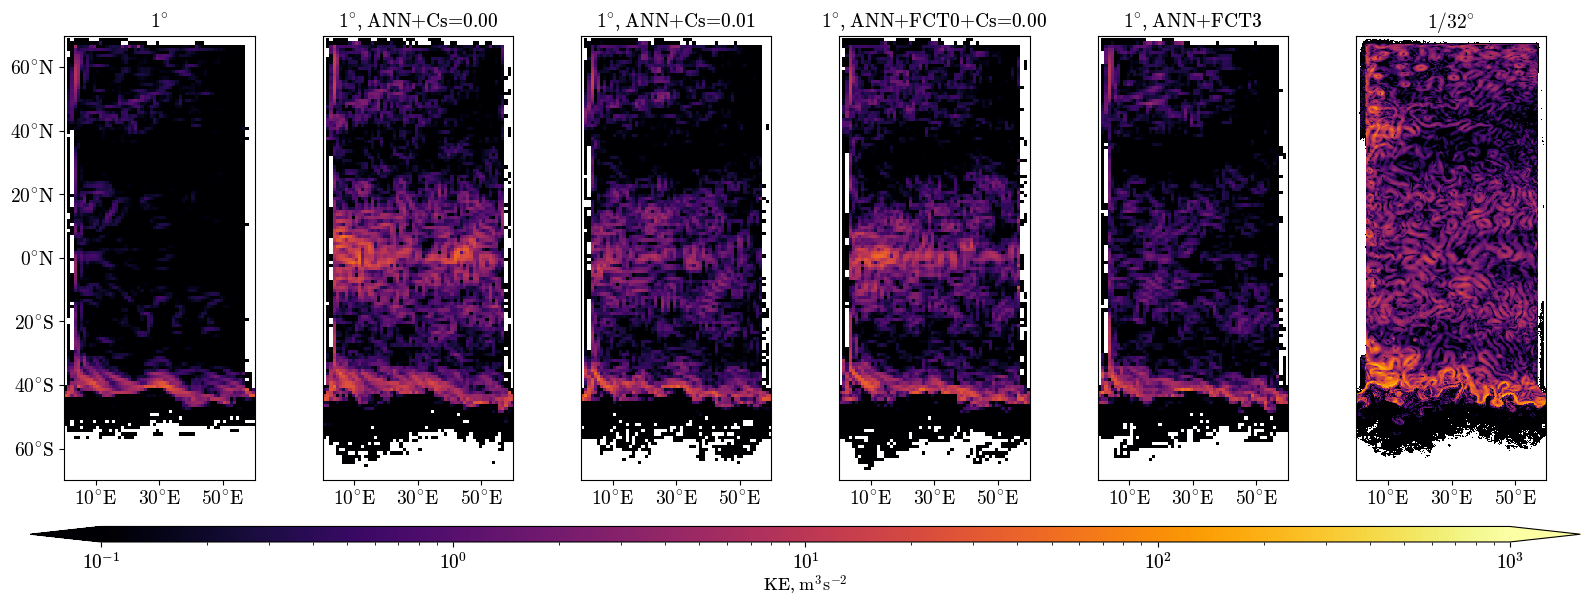

In [49]:
plot(-1,zl=slice(int(layer[-1]),int(layer[-1])+1))